# **Insurance Claim Prediction Dataset**

Python [Sample Insurance Claim Prediction Dataset](https://www.kaggle.com/datasets)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (12,5)
plt.style.use('fivethirtyeight')

import warnings 
warnings.filterwarnings('ignore')


In [ ]:
data = 'https://raw.githubusercontent.com/jcdumlao14/Homework-ml-zoomcamp/main/insurance2.csv'

In [ ]:
!wget $data -O insurance2.csv 

--2022-10-31 02:39:22--  https://raw.githubusercontent.com/jcdumlao14/Homework-ml-zoomcamp/main/insurance2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40665 (40K) [text/plain]
Saving to: ‘insurance2.csv’

insurance2.csv      100%[===================>]  39.71K  --.-KB/s    in 0.002s  

2022-10-31 02:39:22 (25.1 MB/s) - ‘insurance2.csv’ saved [40665/40665]



In [ ]:
!head insurance2.csv

age,sex,bmi,children,smoker,region,charges,insuranceclaim
19,0,27.9,0,1,3,16884.924,1
18,1,33.77,1,0,2,1725.5523,1
28,1,33,3,0,2,4449.462,0
33,1,22.705,0,0,1,21984.47061,0
32,1,28.88,0,0,1,3866.8552,1
31,0,25.74,0,0,2,3756.6216,0
46,0,33.44,1,0,2,8240.5896,1
37,0,27.74,3,0,1,7281.5056,0
37,1,29.83,2,0,0,6406.4107,0


# **Data**

In [ ]:
df = pd.read_csv ('insurance2.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


# **Data Preparation**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [ ]:
df.shape

(1338, 8)

In [ ]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [ ]:
df['smoker'] = df['smoker'].map({0:'non-smoke',1:'smoker'})
df['sex'] = df['sex'].map({0:'female',1:'male'})
df['insuranceclaim'] = df['insuranceclaim'].map({0:'no',1:'yes'})

In [ ]:
categorical = ['sex', 'smoker','region','children']

numerical = ['age', 'bmi','charges']

features = numerical + categorical
target = ['insuranceclaim']

In [ ]:
df.iloc[1].to_dict()

{'age': 18,
 'sex': 'male',
 'bmi': 33.77,
 'children': 1,
 'smoker': 'non-smoke',
 'region': 2,
 'charges': 1725.5523,
 'insuranceclaim': 'yes'}

# **Exploratory Data Analysis**

# **Missing values**

In [ ]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [ ]:
#Print some of the statistics of each column
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

age
[19 18 28 33 32]
47

sex
['female' 'male']
2

bmi
[27.9   33.77  33.    22.705 28.88 ]
548

children
[0 1 3 2 5]
6

smoker
['smoker' 'non-smoke']
2

region
[3 2 1 0]
4

charges
[16884.924    1725.5523   4449.462   21984.47061  3866.8552 ]
1337

insuranceclaim
['yes' 'no']
2



In [ ]:
df.sex = (df.sex == 'male').astype(int)
df.smoker = (df.smoker == 'smoker').astype(int)
df.insuranceclaim = (df.insuranceclaim == 'yes').astype(int)

# **Plot the Class Distribution**

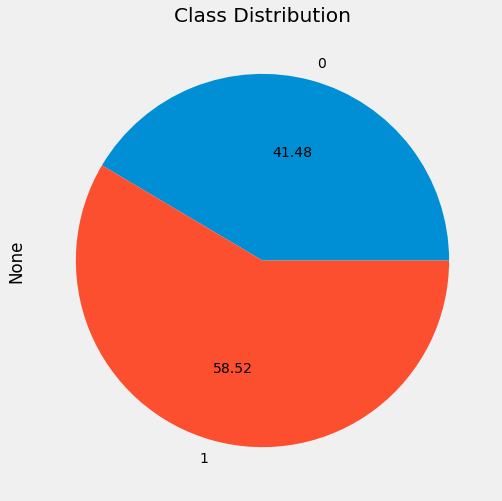

In [ ]:
plt.title("Class Distribution")
df.groupby("insuranceclaim").size().plot(kind='pie', autopct='%.2f', figsize=(10,8))

# **Setting up the validation framework**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.20, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [ ]:
len(df_train), len(df_val), len(df_test)

(802, 268, 268)

In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
y_train = df_train.insuranceclaim.values
y_val = df_val.insuranceclaim.values
y_test = df_test.insuranceclaim.values

del df_train['insuranceclaim']
del df_val['insuranceclaim']
del df_test['insuranceclaim']

In [ ]:
df_full_train = df_full_train.reset_index(drop=True)

In [ ]:
df_full_train

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,53,0,26.600,0,0,1,10355.64100,1
1,53,1,21.400,1,0,3,10065.41300,0
2,18,1,37.290,0,0,2,1141.44510,1
3,60,0,24.035,0,0,1,13012.20865,0
4,45,1,33.700,1,0,3,7445.91800,1
...,...,...,...,...,...,...,...,...
1065,60,1,28.900,0,0,3,12146.97100,1
1066,26,0,29.355,2,0,0,4564.19145,0
1067,51,0,34.960,2,1,0,44641.19740,1
1068,40,0,22.220,2,1,2,19444.26580,0


In [ ]:
df_full_train.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [ ]:
df_full_train.insuranceclaim.value_counts()

1    619
0    451
Name: insuranceclaim, dtype: int64

In [ ]:
df_full_train.insuranceclaim.value_counts(normalize=True)

1    0.578505
0    0.421495
Name: insuranceclaim, dtype: float64

In [ ]:
df_full_train.insuranceclaim.mean()

0.5785046728971963

In [ ]:
df_full_train.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [ ]:
df_full_train[numerical].describe().round(4)

,age,bmi,charges
count,1070.0000,1070.0000,1070.0000
mean,39.0047,30.6701,13230.1616
std,13.9699,6.1257,12082.4402
min,18.0000,15.9600,1121.8739
25%,27.0000,26.2962,4724.3695
50%,39.0000,30.4950,9265.9879
75%,51.0000,34.6562,16584.3182
max,64.0000,53.1300,63770.4280


In [ ]:
df_full_train[categorical].describe().round(4)

,sex,smoker,region,children
count,1070.0000,1070.0000,1070.0000,1070.0000
mean,0.5093,0.2056,1.5150,1.0953
std,0.5001,0.4043,1.1134,1.2081
min,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,1.0000,0.0000
50%,1.0000,0.0000,2.0000,1.0000
75%,1.0000,0.0000,2.0000,2.0000
max,1.0000,1.0000,3.0000,5.0000


# **One-Hot Encoding**

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[features].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[features].to_dict(orient='records')
X_val = dv.transform(val_dict)



# **Metrics**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# **Results DataFrame**

In [ ]:
results = []
columns = ['Model','RMSE','AUC']
df_results = pd.DataFrame(results, columns=columns)

# **Models**


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(solver= 'lbfgs', C=1.0, random_state=1)
lr.fit(X_train,y_train)

y_pred = lr.predict_proba(X_val)[:,1]

model = 'Logistic Regression'
rmse = (np.sqrt(mean_squared_error(y_val,y_pred))).round(4)
auc = (roc_auc_score(y_val,y_pred)).round(4)

results.append((model,rmse,auc))


In [ ]:
model, rmse, auc

('Logistic Regression', 0.3961, 0.8536)

In [ ]:
df_results = pd.DataFrame(results,columns=columns)
df_results

,Model,RMSE,AUC
0,Logistic Regression,0.3961,0.8536


### **Feature Elimination**

In [ ]:
orig_score = auc
auc_result=[]

for c in features:
  subset = features.copy()
  subset.remove(c)

  train_dict = df_train[subset].to_dict(orient='records')

  dv = DictVectorizer(sparse=False)
  dv.fit(train_dict)

  X_train = dv.transform(train_dict)

  lr = LogisticRegression(solver='lbfgs', C=1.0, random_state=1)
  lr.fit(X_train, y_train)

  val_dict = df_val[subset].to_dict(orient='records')
  X_val = dv.transform(val_dict)

  y_pred = lr.predict(X_val)

  score = (roc_auc_score(y_val, y_pred)).round(4)
  diff = (orig_score - score).round(4)
  auc_result.append((c,orig_score,score, diff))
                      

In [ ]:
auc_columns = ['Eliminate_Feature', 'AUC','AUC_Elimination','Diff']
df_auc_results = pd.DataFrame(auc_result,columns=auc_columns)
df_auc_results = df_auc_results.sort_values(by='Diff', ascending=False).reset_index(drop=True)
df_auc_results

,Eliminate_Feature,AUC,AUC_Elimination,Diff
0,children,0.8536,0.5021,0.3515
1,bmi,0.8536,0.7439,0.1097
2,age,0.8536,0.7677,0.0859
3,smoker,0.8536,0.7786,0.0750
4,sex,0.8536,0.8064,0.0472
5,charges,0.8536,0.8929,-0.0393
6,region,0.8536,0.8973,-0.0437


# **Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
for a in [0, 0.01,0.1,1,10]:
  reg = Ridge(alpha=a, random_state=1)
  reg.fit(X_train, y_train)

  y_pred = reg.predict(X_val)

  rmse = (np.sqrt(mean_squared_error(y_val,y_pred))).round(4)
  auc = (roc_auc_score(y_val,y_pred)).round(4)

  print('alpha=%s  %0.4f   %0.4f'%(a, rmse,auc))
  

alpha=0  0.4329   0.7870
alpha=0.01  0.4329   0.7870
alpha=0.1  0.4329   0.7871
alpha=1  0.4330   0.7872
alpha=10  0.4346   0.7862


It give us alpha is equal to 0.01 

In [ ]:
reg = Ridge(alpha=0.01, random_state=1)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_val)

model = 'Ridge Regression'
rmse = (np.sqrt(mean_squared_error(y_val,y_pred))).round(4)
auc = (roc_auc_score(y_val,y_pred)).round(4)

results.append((model,rmse,auc))


In [ ]:
model, rmse, auc

('Ridge Regression', 0.4329, 0.787)

In [ ]:
df_results = pd.DataFrame(results,columns=columns)
df_results

,Model,RMSE,AUC
0,Logistic Regression,0.3961,0.8536
1,Ridge Regression,0.4329,0.7870


# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

## **Tuninig the max_depth and min_samples_leaf parameter:**

In [ ]:
depths = [1, 2, 3, 4, 5, 7, 8, 10, 12, 15, 20, None]

for depth in depths:
  dt = DecisionTreeClassifier(max_depth=depth, random_state=1)
  dt.fit(X_train, y_train)

  y_pred = dt.predict(X_val)

  rmse = (np.sqrt(mean_squared_error(y_val,y_pred))).round(4)
  auc = (roc_auc_score(y_val,y_pred)).round(4)

  print('%4s -> %.4f   %.4f'%(depth, rmse,auc))
  

   1 -> 0.5531   0.6504
   2 -> 0.5395   0.6609
   3 -> 0.5255   0.6750
   4 -> 0.4771   0.7673
   5 -> 0.4447   0.7931
   7 -> 0.4405   0.7831
   8 -> 0.4848   0.7572
  10 -> 0.4848   0.7548
  12 -> 0.4887   0.7540
  15 -> 0.5037   0.7399
  20 -> 0.4925   0.7496
None -> 0.4925   0.7496


  * The best results are:
      * maxdepth = 8 -> 0.4848   0.7572
      * maxdepth = 10 -> 0.4848   0.7548

In [ ]:
scores = []

for depth in [8,10]:
  for s in [1,5,10,15,20,50,80,100,200,500]:
    dt = DecisionTreeClassifier(max_depth=depth,min_samples_leaf=s, random_state=1)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:,1]
    
    rmse = (np.sqrt(mean_squared_error(y_val,y_pred))).round(4)
    auc = (roc_auc_score(y_val,y_pred)).round(4)
    scores.append((depth,s, rmse,auc))

In [ ]:
dt_columns = ['max_depth','min_samples_leaf','rmse', 'auc']
df_scores = pd.DataFrame(scores, columns= dt_columns)

In [ ]:
df_scores

,max_depth,min_samples_leaf,rmse,auc
0,8,1,0.4184,0.8308
1,8,5,0.3996,0.8502
2,8,10,0.3972,0.8491
3,8,15,0.3939,0.8493
4,8,20,0.4044,0.8284
5,8,50,0.4078,0.8326
6,8,80,0.4033,0.8360
7,8,100,0.4153,0.8112
8,8,200,0.4529,0.7097
9,8,500,0.4938,0.5000


In [ ]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(4)

auc        
max_depth             8       10
min_samples_leaf                
1                 0.8308  0.7944
5                 0.8502  0.8448
10                0.8491  0.8425
15                0.8493  0.8493
20                0.8284  0.8284
50                0.8326  0.8326
80                0.8360  0.8360
100               0.8112  0.8112
200               0.7097  0.7097
500               0.5000  0.5000

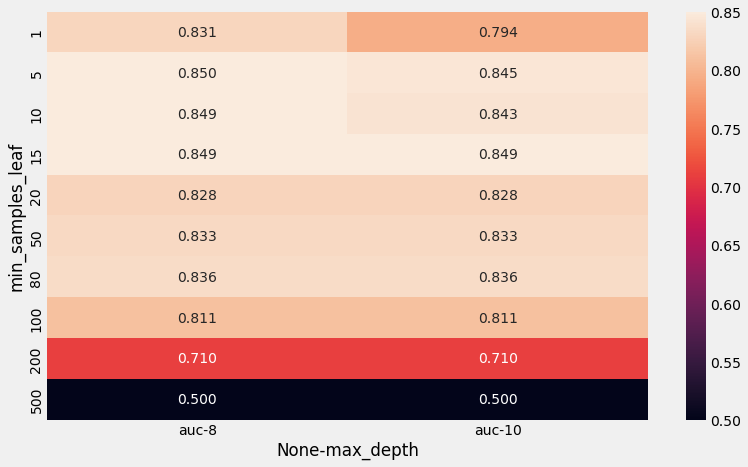

In [ ]:
plt.figure(figsize=(12,7))
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")


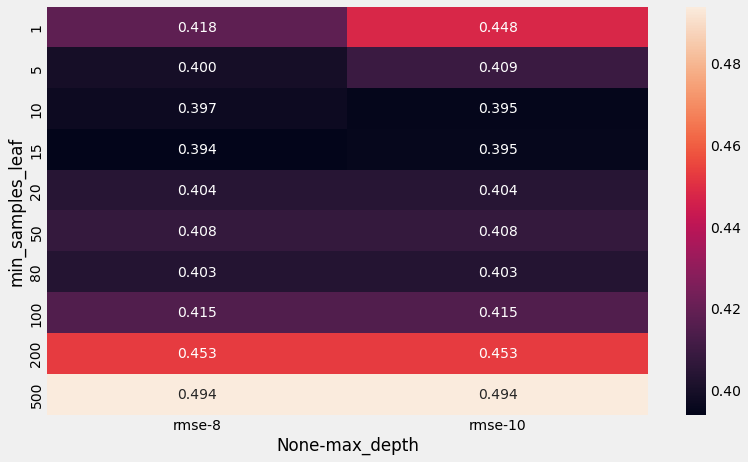

In [ ]:
plt.figure(figsize=(12,7))
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['rmse'])
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")


* It is easier to find the highest value, the lightest color the most, and then the darkest is the worst one.

* max_depth=10, min_samples_leaf=80

In [ ]:
dt = DecisionTreeClassifier(max_depth=10,min_samples_leaf=80, random_state=1)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_val)[:,1]

model = 'Decision Tree'
rmse = (np.sqrt(mean_squared_error(y_val,y_pred))).round(4)
auc = (roc_auc_score(y_val,y_pred)).round(4)

results.append((model,rmse,auc))


In [ ]:
model, rmse, auc

('Decision Tree', 0.4033, 0.836)

In [ ]:
df_results = pd.DataFrame(results, columns=columns)
df_results

,Model,RMSE,AUC
0,Logistic Regression,0.3961,0.8536
1,Ridge Regression,0.4329,0.7870
2,Decision Tree,0.4033,0.8360


In [ ]:
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier,plot_tree



In [ ]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- bmi <= 25.98
|   |--- charges <= 10986.52
|   |   |--- class: 0
|   |--- charges >  10986.52
|   |   |--- class: 0
|--- bmi >  25.98
|   |--- smoker <= 0.50
|   |   |--- charges <= 3273.00
|   |   |   |--- class: 1
|   |   |--- charges >  3273.00
|   |   |   |--- age <= 41.50
|   |   |   |   |--- bmi <= 30.96
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- bmi >  30.96
|   |   |   |   |   |--- class: 0
|   |   |   |--- age >  41.50
|   |   |   |   |--- bmi <= 34.31
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- bmi >  34.31
|   |   |   |   |   |--- class: 1
|   |--- smoker >  0.50
|   |   |--- class: 1



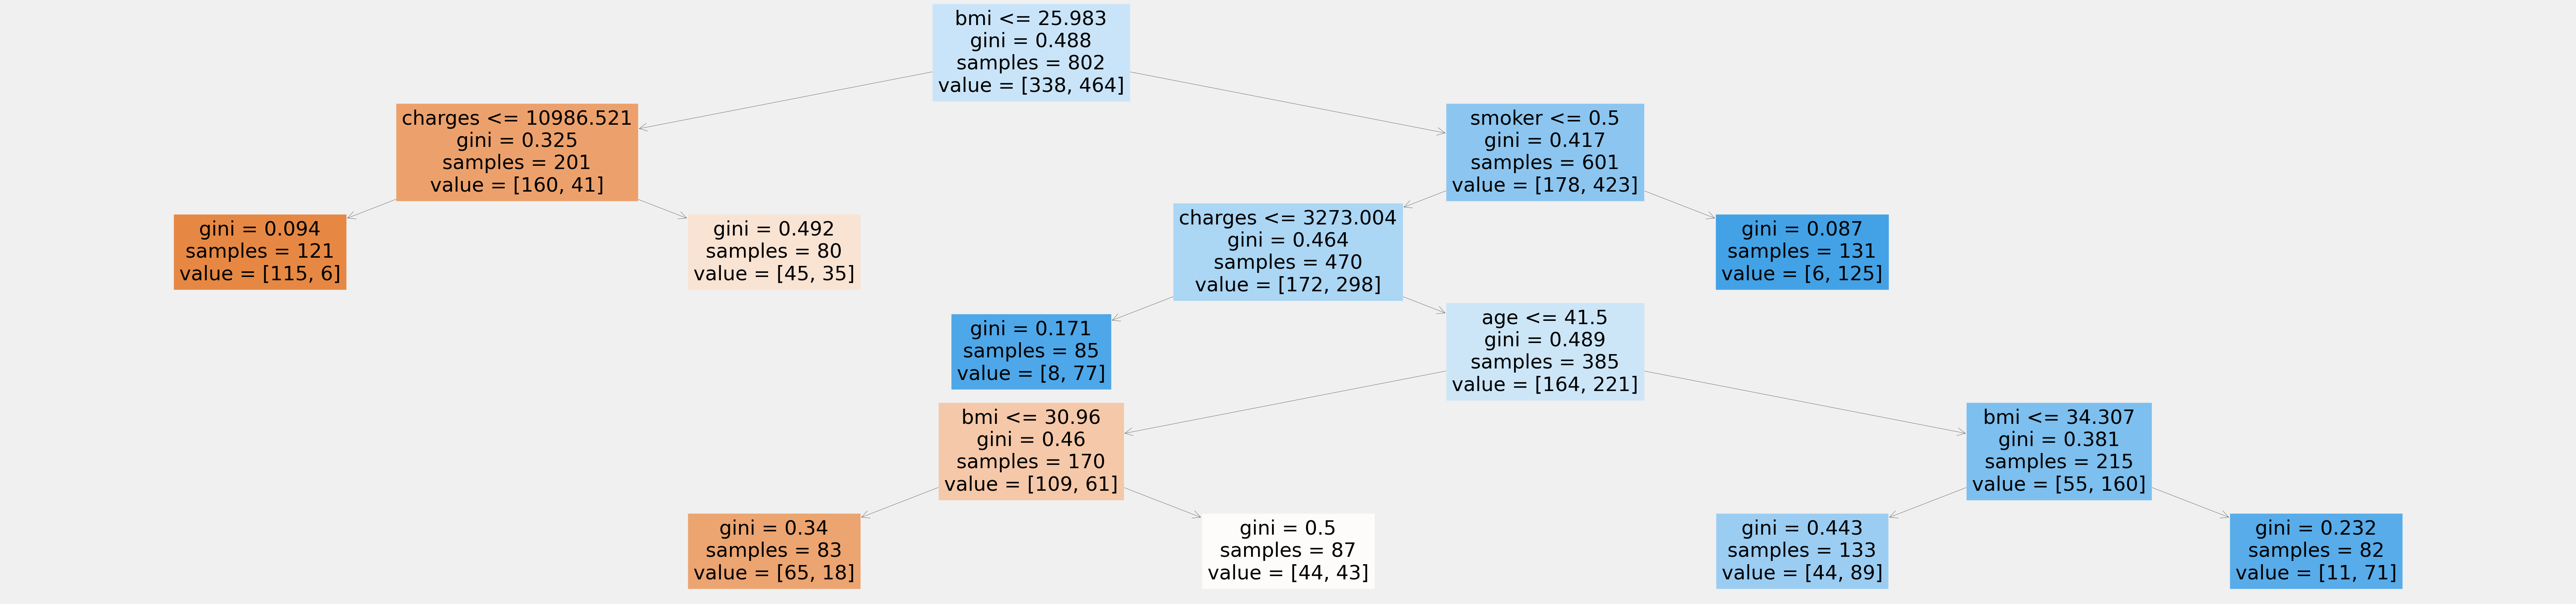

In [ ]:
# visualize the decision tree
fig = plt.figure(figsize=(100,25))
plot = plot_tree(dt, feature_names=dv.get_feature_names(),filled=True)
#fig.savefig('images/decision_tree.png')


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_val)[:,1]
    
    rmse = (np.sqrt(mean_squared_error(y_val,y_pred))).round(4)
    auc = (roc_auc_score(y_val,y_pred)).round(4)

    scores.append(( n, rmse,auc))

In [ ]:
df_scores =pd.DataFrame(scores, columns=['n_estimators','rmse','auc'])

In [ ]:
df_scores

,n_estimators,rmse,auc
0,10,0.3731,0.8772
1,20,0.3612,0.8913
2,30,0.3611,0.8913
3,40,0.3608,0.8910
4,50,0.3609,0.8917
5,60,0.3644,0.8870
6,70,0.3644,0.8871
7,80,0.3657,0.8853
8,90,0.3674,0.8828
9,100,0.3669,0.8843


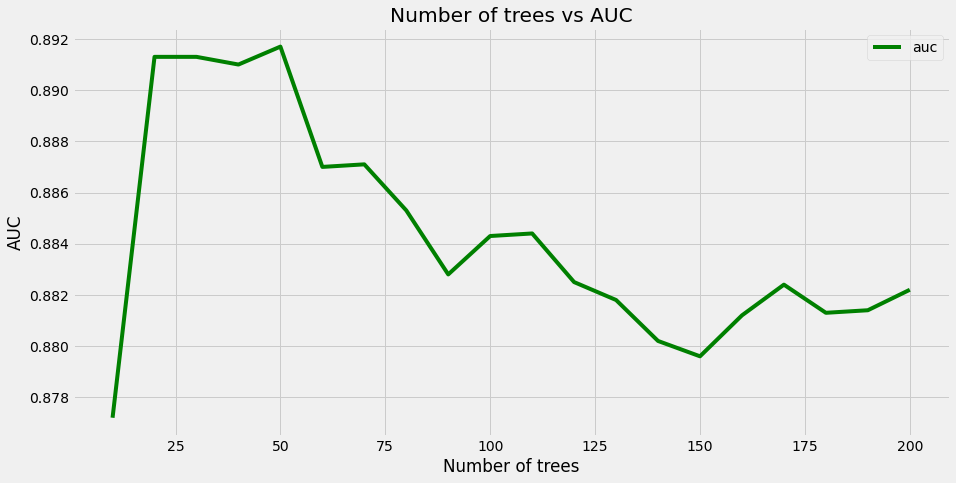

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(df_scores.n_estimators, df_scores.auc, 'g',label='auc')

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')
plt.legend()

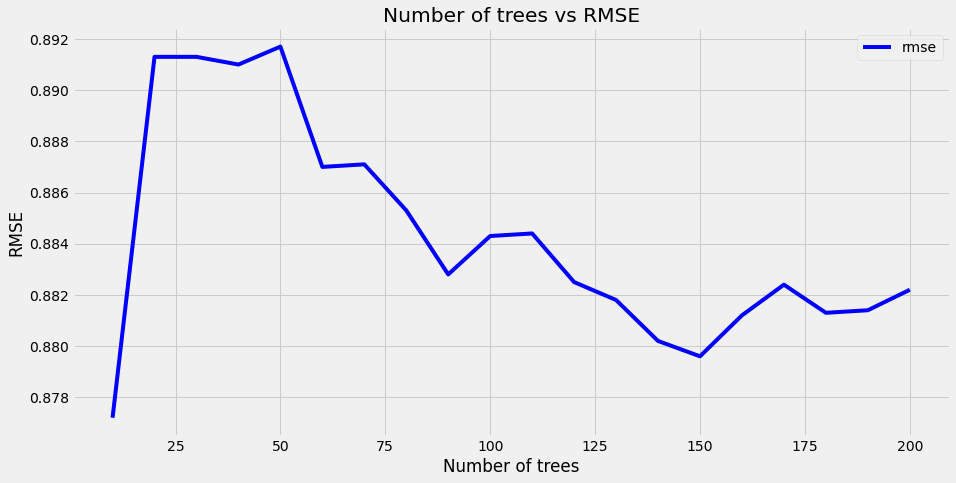

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(df_scores.n_estimators, df_scores.auc, 'b',label='rmse')

plt.title('Number of trees vs RMSE')
plt.xlabel('Number of trees')
plt.ylabel('RMSE')
plt.legend()

In [ ]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1,
                                    warm_start=True)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]

        rmse = (np.sqrt(mean_squared_error(y_val,y_pred))).round(4)
        auc = roc_auc_score(y_val, y_pred).round(4)

        scores.append((d, n, rmse, auc))

In [ ]:
rf_columns = ['max_depth', 'n_estimators', 'auc','rmse']
df_scores = pd.DataFrame(scores, columns=rf_columns)

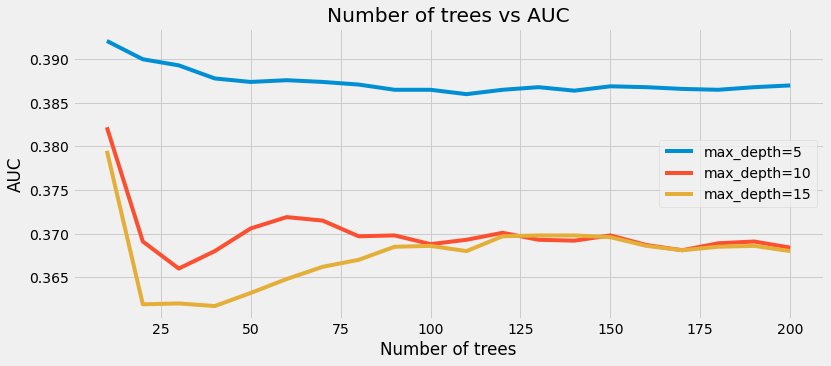

In [ ]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')
plt.legend()

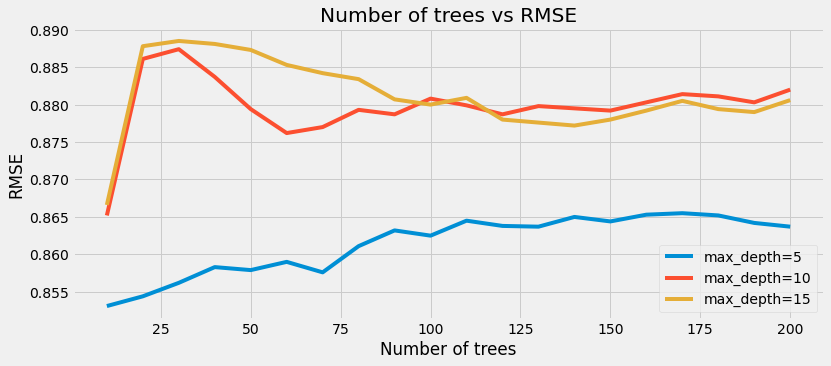

In [ ]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)

plt.title('Number of trees vs RMSE')
plt.xlabel('Number of trees')
plt.ylabel('RMSE')
plt.legend()

* max_depth=15

In [ ]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=15,
                                    min_samples_leaf=s,
                                    random_state=1,
                                    warm_start=True)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        rmse = (np.sqrt(mean_squared_error(y_val,y_pred))).round(4)
        auc = roc_auc_score(y_val, y_pred).round(4)
  
        scores.append((s, n,rmse, auc))

In [ ]:
rf_columns = ['min_samples_leaf', 'n_estimators', 'auc','rmse']
df_scores = pd.DataFrame(scores, columns=rf_columns)
df_scores.head()

,min_samples_leaf,n_estimators,auc,rmse
0,1,10,0.3795,0.8666
1,1,20,0.3619,0.8878
2,1,30,0.3620,0.8885
3,1,40,0.3617,0.8881
4,1,50,0.3632,0.8873


In [ ]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
list(zip(min_samples_leaf_values,colors))

[(1, 'black'), (3, 'blue'), (5, 'orange'), (10, 'red'), (50, 'grey')]

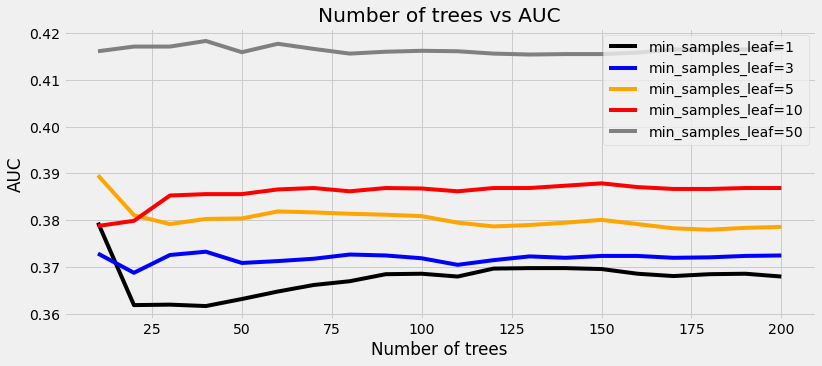

In [ ]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')
plt.legend()

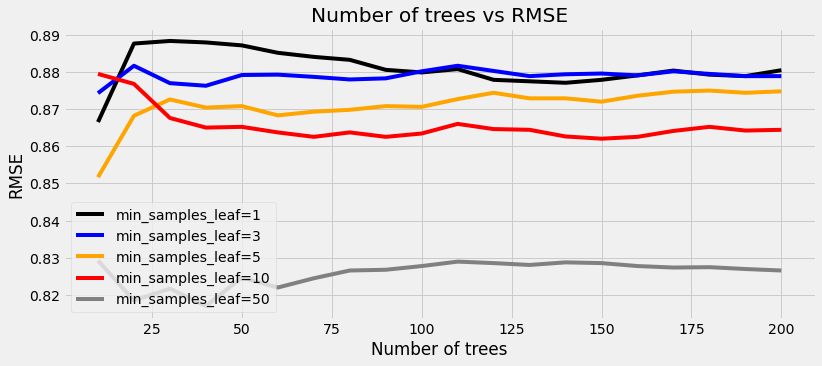

In [ ]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.title('Number of trees vs RMSE')
plt.xlabel('Number of trees')
plt.ylabel('RMSE')
plt.legend()

In [ ]:
min_samples_leaf = 1

In [ ]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=15,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1,
                            warm_start=True)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:,1]

model = 'Random Forest'
rmse = (np.sqrt(mean_squared_error(y_val,y_pred))).round(4)
auc = (roc_auc_score(y_val,y_pred)).round(4)

results.append((model,rmse,auc))

In [ ]:
model, rmse, auc

('Random Forest', 0.368, 0.8806)

In [ ]:
df_results = pd.DataFrame(results, columns=columns)
df_results

,Model,RMSE,AUC
0,Logistic Regression,0.3961,0.8536
1,Ridge Regression,0.4329,0.7870
2,Decision Tree,0.4033,0.8360
3,Random Forest,0.3680,0.8806


# **XGBoost**

In [ ]:
import xgboost as xgb

In [ ]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [ ]:
watchlist = [(dtrain,'train'),(dval,'val')]

In [ ]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

## **Parameter tuning: eta**

In [ ]:
scores = {}

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.5, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
parse_xgb_output(output)

,num_iter,train_auc,val_auc
0,0,0.920899,0.842906
1,5,0.974559,0.891407
2,10,0.994909,0.900599
3,15,0.998380,0.897459
4,20,0.999624,0.894890
5,25,0.999987,0.900257
6,30,1.000000,0.899286
7,35,1.000000,0.904025
8,40,1.000000,0.900771
9,45,1.000000,0.899401


In [ ]:
key = 'eta=%s'% (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key


'eta=0.5'

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
key = 'eta=%s'% (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
key = 'eta=%s'% (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [ ]:
%%capture output

xgb_params = {
    'eta': 1.0, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
key = 'eta=%s'% (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=1.0'

In [ ]:
scores['eta=0.1']

,num_iter,train_auc,val_auc
0,0,0.920899,0.842906
1,5,0.937656,0.869398
2,10,0.948231,0.878561
3,15,0.957250,0.886583
4,20,0.968122,0.898458
5,25,0.972541,0.901970
6,30,0.978467,0.901056
7,35,0.984018,0.902455
8,40,0.987598,0.903768
9,45,0.990161,0.904853


In [ ]:
%%capture output

xgb_params = {
    'eta': 0.05, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
key = 'eta=%s'% (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.05'

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
key = 'eta=%s'% (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.01'

In [ ]:
scores

{'eta=0.5':     num_iter  train_auc   val_auc
 0          0   0.920899  0.842906
 1          5   0.974559  0.891407
 2         10   0.994909  0.900599
 3         15   0.998380  0.897459
 4         20   0.999624  0.894890
 5         25   0.999987  0.900257
 6         30   1.000000  0.899286
 7         35   1.000000  0.904025
 8         40   1.000000  0.900771
 9         45   1.000000  0.899401
 10        50   1.000000  0.899172
 11        55   1.000000  0.899572
 12        60   1.000000  0.900257
 13        65   1.000000  0.900599
 14        70   1.000000  0.898887
 15        75   1.000000  0.899629
 16        80   1.000000  0.900771
 17        85   1.000000  0.902369
 18        90   1.000000  0.901056
 19        95   1.000000  0.901228
 20        99   1.000000  0.900885,
 'eta=0.3':     num_iter  train_auc   val_auc
 0          0   0.920899  0.842906
 1          5   0.964551  0.891522
 2         10   0.980693  0.897031
 3         15   0.987436  0.899001
 4         20   0.994823  0.8991

In [ ]:
scores.keys()

dict_keys(['eta=0.5', 'eta=0.3', 'eta=0.1', 'eta=1.0', 'eta=0.05', 'eta=0.01'])

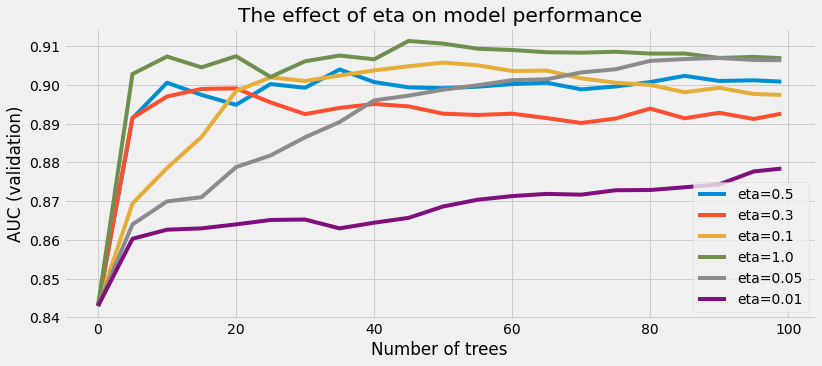

In [ ]:
for key, df_score in scores.items():
  plt.plot(df_score.num_iter, df_score.val_auc, label=key)

plt.title('The effect of eta on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')
plt.legend()

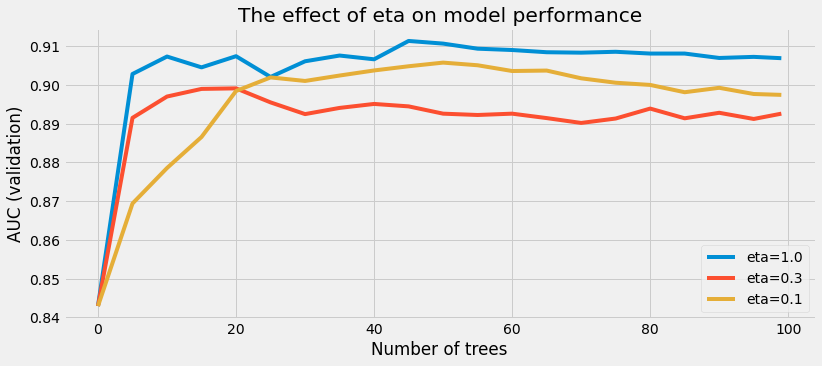

In [ ]:
etas =['eta=1.0', 'eta=0.3', 'eta=0.1']

for eta in etas:
  df_score = scores[eta]
  plt.plot(df_score.num_iter, df_score.val_auc, label=eta)

plt.title('The effect of eta on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')
plt.legend()


In [ ]:
scores = {}

In [ ]:
%%capture output

xgb_params = {
    'eta': 1.0, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
key = 'max_depth=%s'% (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=3'

In [ ]:
%%capture output

xgb_params = {
    'eta': 1.0, 
    'max_depth': 4,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
key = 'max_depth=%s'% (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=4'

In [ ]:
%%capture output

xgb_params = {
    'eta': 1.0, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
key = 'max_depth=%s'% (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=6'

In [ ]:
scores.keys()

dict_keys(['max_depth=3', 'max_depth=4', 'max_depth=6'])

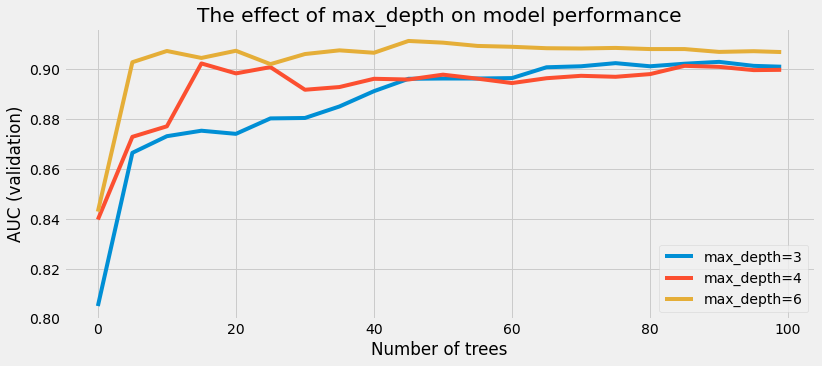

In [ ]:
for key, df_score in scores.items():
  plt.plot(df_score.num_iter, df_score.val_auc, label=key)

plt.title('The effect of max_depth on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')
plt.legend()

* max_depth=6

## **Tune "min_child_weight"**

In [ ]:
scores = {}

In [ ]:
%%capture output

xgb_params = {
    'eta': 1.0, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
key = 'min_child_weight=%s'% (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=1'

In [ ]:
%%capture output

xgb_params = {
    'eta': 1.0, 
    'max_depth': 6,
    'min_child_weight': 10,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
key = 'min_child_weight=%s'% (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=10'

In [ ]:
%%capture output

xgb_params = {
    'eta': 1.0, 
    'max_depth': 6,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [ ]:
key = 'min_child_weight=%s'% (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

In [ ]:
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=10', 'min_child_weight=30'])

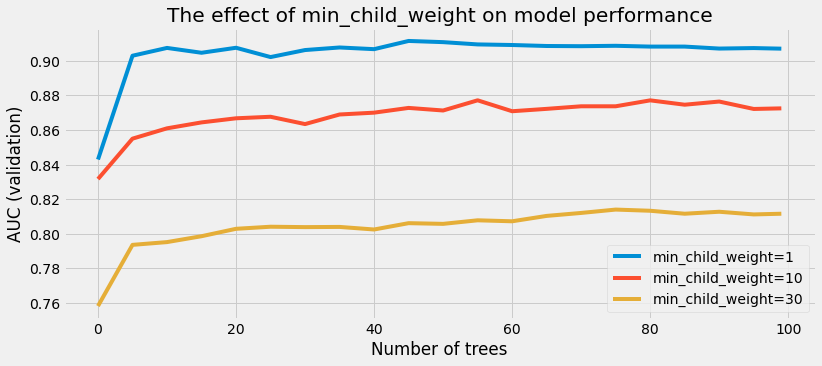

In [ ]:
for key, df_score in scores.items():
  plt.plot(df_score.num_iter, df_score.val_auc, label=key)

plt.title('The effect of min_child_weight on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')
plt.legend()



* min_child_weight= 1

In [ ]:
xgb_params = {
    'eta': 1.0, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

xgbmodel = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

[0]	train-auc:0.920899	val-auc:0.842906
[5]	train-auc:0.991271	val-auc:0.902855
[10]	train-auc:0.999643	val-auc:0.907365
[15]	train-auc:1	val-auc:0.904568
[20]	train-auc:1	val-auc:0.907451
[25]	train-auc:1	val-auc:0.902084
[30]	train-auc:1	val-auc:0.906138
[35]	train-auc:1	val-auc:0.907622
[40]	train-auc:1	val-auc:0.906651
[45]	train-auc:1	val-auc:0.91139
[50]	train-auc:1	val-auc:0.910705
[55]	train-auc:1	val-auc:0.909392
[60]	train-auc:1	val-auc:0.909049
[65]	train-auc:1	val-auc:0.908478
[70]	train-auc:1	val-auc:0.908364
[75]	train-auc:1	val-auc:0.908593
[80]	train-auc:1	val-auc:0.908136
[85]	train-auc:1	val-auc:0.908136
[90]	train-auc:1	val-auc:0.906994
[95]	train-auc:1	val-auc:0.907279
[99]	train-auc:1	val-auc:0.906937


In [ ]:
y_pred = xgbmodel.predict(dval)

model = 'XGBoost'
rmse = (np.sqrt(mean_squared_error(y_val,y_pred))).round(4)
auc = (roc_auc_score(y_val,y_pred)).round(4)

results.append((model,rmse,auc))

In [ ]:
model,rmse, auc

('XGBoost', 0.3734, 0.9069)

In [ ]:
df_results = pd.DataFrame(results, columns=columns)
df_results

,Model,RMSE,AUC
0,Logistic Regression,0.3961,0.8536
1,Ridge Regression,0.4329,0.7870
2,Decision Tree,0.4033,0.8360
3,Random Forest,0.3680,0.8806
4,XGBoost,0.3734,0.9069


# **Finding Threshold**

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    return df_scores
    

In [ ]:
y_pred = xgbmodel.predict(dval)
df_scores = confusion_matrix_dataframe(y_val, y_pred)

In [ ]:
df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)

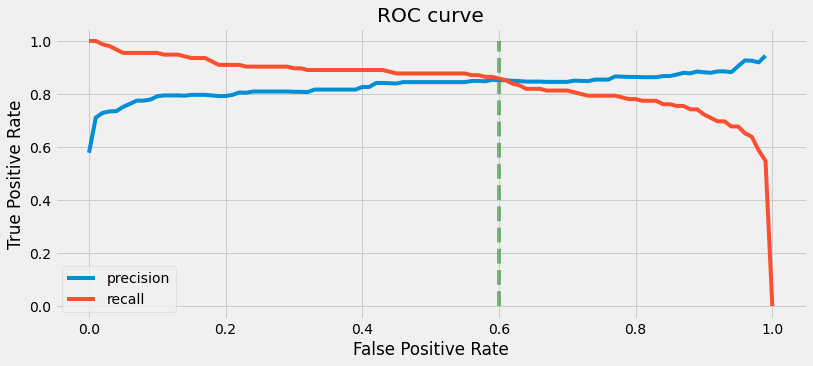

In [ ]:
plt.plot(df_scores.threshold, df_scores.p, label='precision')
plt.plot(df_scores.threshold, df_scores.r, label='recall')

#plt.ylim(0.2,0.4)
#plt.xlim(0.2,0.4)
plt.vlines(0.6, 0,1, color='green', linestyle='--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')
plt.legend()

plt.show()

In [ ]:
df_full_train

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,53,0,26.600,0,0,1,10355.64100,1
1,53,1,21.400,1,0,3,10065.41300,0
2,18,1,37.290,0,0,2,1141.44510,1
3,60,0,24.035,0,0,1,13012.20865,0
4,45,1,33.700,1,0,3,7445.91800,1
...,...,...,...,...,...,...,...,...
1065,60,1,28.900,0,0,3,12146.97100,1
1066,26,0,29.355,2,0,0,4564.19145,0
1067,51,0,34.960,2,1,0,44641.19740,1
1068,40,0,22.220,2,1,2,19444.26580,0


In [ ]:
y_full_train = df_full_train.insuranceclaim.values

In [ ]:
del df_full_train['insuranceclaim']

In [ ]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)


In [ ]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=dv.get_feature_names())

dtest = xgb.DMatrix(X_test,feature_names=dv.get_feature_names())

In [ ]:
xgb_params = {
    'eta': 1.0, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

xgbmodel = xgb.train(xgb_params, dfulltrain, num_boost_round=100)
                  

In [ ]:
y_pred = xgbmodel.predict(dtest)

rmse = (np.sqrt(mean_squared_error(y_test,y_pred))).round(4)
auc = (roc_auc_score(y_test,y_pred)).round(4)

print('auc=',auc)
print('rmse=',rmse)


auc= 0.9877
rmse= 0.1255


# **Test the Model**

In [ ]:
customer = {"age": 18,
            "sex": "male",
            "bmi": 33.77,
            "children": 1,
            "smoker": "non-smoke",
            "region": 2,
            "charges": 1725.5523,
            "insuranceclaim": "yes"
            }
            

In [ ]:
X = dv.transform([customer])

In [ ]:
dtest = xgb.DMatrix(X, feature_names=dv.get_feature_names())

In [ ]:
y_pred = xgbmodel.predict(dtest)
if y_pred > 0.3:
  print('Customer is interested to Claimed Health Insurance')
else:
  print('Customer is Not interested to Claimed Health Insurance')

Customer is interested to Claimed Health Insurance
